# 기계학습 - 타이타닉 데이터 분석 및 머신러닝 모형 구축 과제

In [1]:
import warnings

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

In [2]:
# README.md도 만들고
# nbviewer?도 사용하기

# 과제 점수는  accuracy가 아닌 dataset를 분석하여 어떤 통찰력을 가졌는지에 대한 부분

# 티켓 등급과 가격으로 생존 예측
# 티켓 등급과 출항지로 티켓 가격 회귀 예측

# correlationship 확인하고 그거 기반으로 가설 생성
# 가설에 대한 eda 및 전처리 진행
# 동일 모델로 원본 데이터 훈련한 결과와 전처리 진행한 데이터 결과 비교
# prove it!

## 데이터 정의 확인
- Survival:	생존 여부 (0 = No, 1 = Yes)
- Pclass: 티켓 등급 (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name: 이름
- Sex: 성별
- Age: 나이
- Sibsp: 타이타닉에 탑승한 형제 / 배우자의 수
- Parch: 타이타닉에 탑승한 부모 / 자녀의 수
- Ticket: 티켓 번호
- Fare: 승객 요금
- Cabin: 객실 번호
- Embarked: 기항지 위치	(C = Cherbourg, Q = Queenstown, S = Southampton)

| Key | 정의 | 비고 |
|-----|------|-----|
| Survival | 생존 여부 | (0 = No, 1 = Yes) |
| Pclass | 티켓 등급 | (1 = 1st, 2 = 2nd, 3 = 3rd) |
| Name | 이름 | |
| Sex | 성별 | |
| Age | 나이 | |
| Sibsp | 타이타닉에 탑승한 형제 / 배우자의 수 | |
| Parch | 타이타닉에 탑승한 부모 / 자녀의 수 | |
| Ticket | 티켓 번호 | |
| Fare | 승객 요금 | |
| Cabin | 객실 번호 | |
| Embarked | 기항지 위치 | C = Cherbourg, Q = Queenstown, S = Southampton |

## 데이터 분석

### 훈련 데이터 확인

In [3]:
# 훈련 데이터 불러오기
train_df = pd.read_csv("./data/train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 훈련 데이터 분석 요약

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 테스트 데이터 확인

In [7]:
test_df = pd.read_csv("./data/test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### 테스트 데이터 분석 요약

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 데이터 전처리
- Unique 값이 대부분인 Name 열과 Ticket 열 제거
- Sex 열의 male은 0, female은 1로 변환
- Age 열은 방치
- NaN 값이 대부분인 Cabin 열 제거
- Embarcked 열의 S는 0, C는 1, Q는 2, NaN은 최빈값인 S(=0)로 변환
- Fare 열의 NaN 값은 평균으로 변환

#### 훈련 데이터 전처리

In [11]:
df = train_df.copy()

df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2
df.loc[pd.isna(df['Embarked']), 'Embarked'] = 0
df['Embarked'] = df['Embarked'].astype(int)

df.loc[df['Sex'] == 'male', 'Sex'] = 1
df.loc[df['Sex'] == 'female', 'Sex'] = 0
df['Sex'] = df['Sex'].astype(int)

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0
887,888,1,1,0,19.0,0,0,30.0000,0
888,889,0,3,0,NaN,1,2,23.4500,0
889,890,1,1,1,26.0,0,0,30.0000,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

#### 테스트 데이터 전처리

In [15]:
test = test_df.copy()

test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

test.loc[test['Embarked'] == 'S', 'Embarked'] = 0
test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2
test.loc[pd.isna(test['Embarked']), 'Embarked'] = 0
test['Embarked'] = test['Embarked'].astype(int)

test.loc[test['Sex'] == 'male', 'Sex'] = 1
test.loc[test['Sex'] == 'female', 'Sex'] = 0
test['Sex'] = test['Sex'].astype(int)

test['Fare'] = test['Fare'].fillna(test['Fare'].median())

test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,8.0500,0
414,1306,1,0,39.0,0,0,108.9000,1
415,1307,3,1,38.5,0,0,7.2500,0
416,1308,3,1,NaN,0,0,8.0500,0


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [17]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,35.576535,0.464115
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.850103,0.685516
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.471875,1.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [18]:
test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

### 데이터 변수 간 상관계수 확인

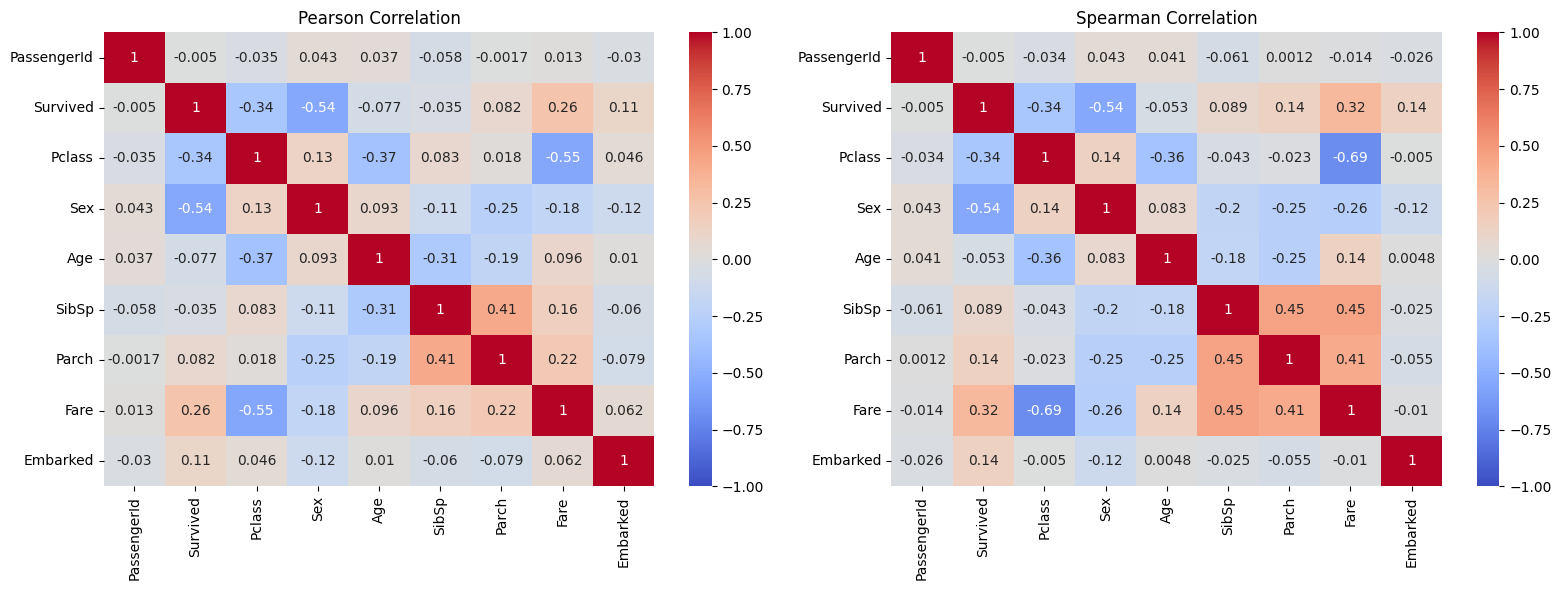

In [19]:
# 피어슨 상관계수 및 스피어만 상관계수 확인
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Pearson Correlation')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Spearman Correlation')
plt.tight_layout()
plt.show()

위의 두 히트맵에서 Survived는 Pclass, Sex, Fare와 상관관계가 있는 것이 확인됨

또한, Pclass와 Fare도 상관관계가 있는 것이 확인됨

따라서, Pclass와 Fare를 통해 Survived를 예측하는 작업을 진행할 것임

## 목표 데이터 시각화

### 단일 변수 시각화

#### 생존자/사망자 및 티켓 등급 비율

생존자 수: 342, 사망자 수: 549
1등석 수: 216, 2등석 수: 184, 3등석 수: 491


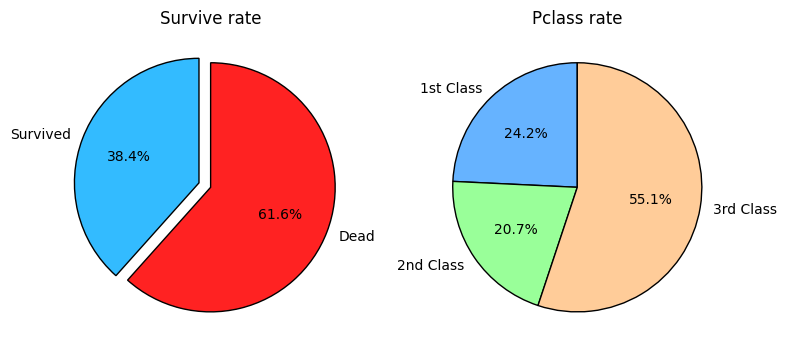

In [20]:
survived_count = sum(df['Survived'])
dead_count = len(df) - survived_count

labels_survival = ['Survived', 'Dead']
sizes_survival = [survived_count, dead_count]
colors_survival = ['#33bbff', '#ff2222']

pclass_counts = df['Pclass'].value_counts().sort_index()
labels_pclass = ['1st Class', '2nd Class', '3rd Class']
sizes_pclass = pclass_counts.values
colors_pclass = ['#66b3ff', '#99ff99', '#ffcc99']

print(f"생존자 수: {survived_count}, 사망자 수: {dead_count}")
print(f"1등석 수: {sizes_pclass[0]}, 2등석 수: {sizes_pclass[1]}, 3등석 수: {sizes_pclass[2]}")

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].pie(
    sizes_survival,
    labels=labels_survival,
    colors=colors_survival,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0),
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title("Survive rate")

axes[1].pie(
    sizes_pclass,
    labels=labels_pclass,
    colors=colors_pclass,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
axes[1].set_title("Pclass rate")

plt.tight_layout()
plt.show()

#### Fare 분포

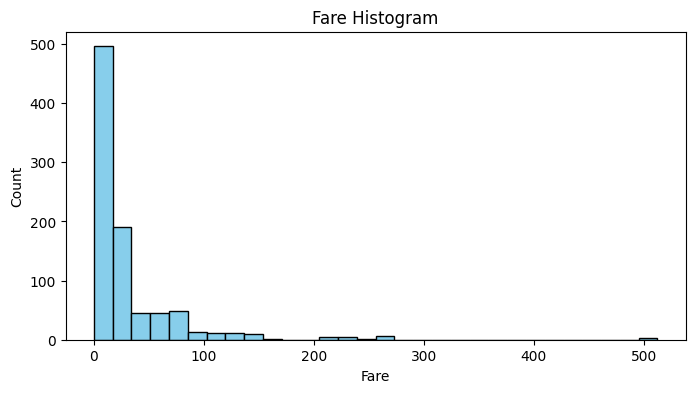

In [21]:
plt.figure(figsize=(8, 4))
plt.hist(df['Fare'], bins=30, color='skyblue', edgecolor='black')
plt.title("Fare Histogram")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

#### Pclass 별 생존자/사망자 수

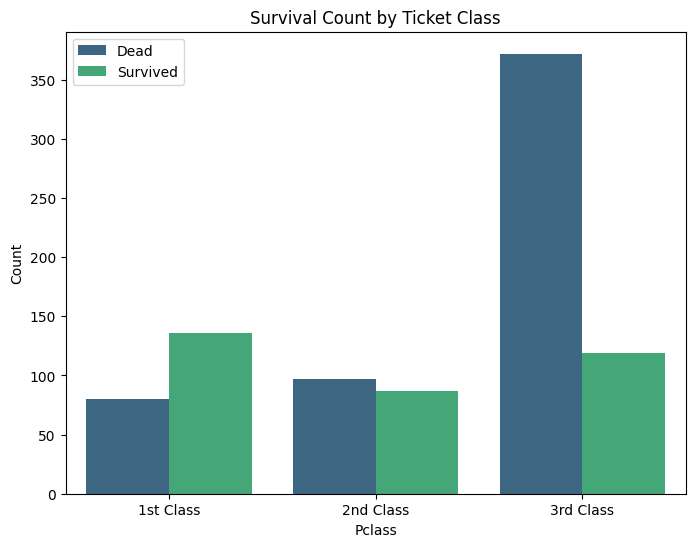

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Pclass", hue="Survived", palette="viridis")
plt.title("Survival Count by Ticket Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.legend(labels=["Dead", "Survived"])
plt.show()

### 다중 변수 시각화

#### Pclass와 Fare 산점도 및 박스플롯

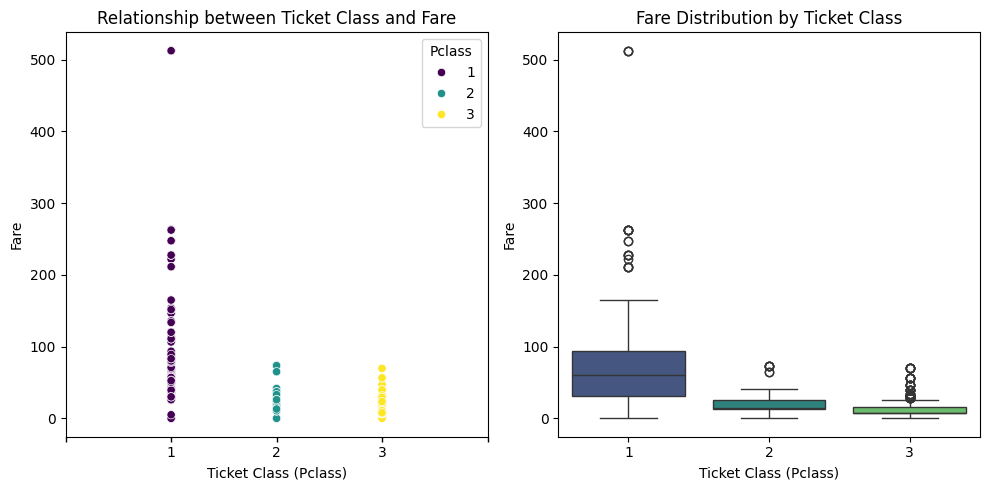

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(data=df, x="Pclass", y="Fare", hue="Pclass", palette="viridis", ax=axes[0])
axes[0].set_xticks([0, 1, 2, 3, 4])
axes[0].set_xticklabels(['', 1, 2, 3, ''])
axes[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, width=1)
axes[0].set_title("Relationship between Ticket Class and Fare")
axes[0].set_xlabel("Ticket Class (Pclass)")
axes[0].set_ylabel("Fare")

sns.boxplot(data=df, x="Pclass", y="Fare", palette="viridis", ax=axes[1])
axes[1].set_title("Fare Distribution by Ticket Class")
axes[1].set_xlabel("Ticket Class (Pclass)")
axes[1].set_ylabel("Fare")

plt.tight_layout()
plt.show()

## 머신러닝 모델 학습

In [24]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [25]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0


In [29]:
y = df['Survived']

whole_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
whole_X = df[whole_features]
whole_X_test = test[whole_features]

whole_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
whole_model.fit(whole_X, y)
predictions = whole_model.predict(whole_X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('outputs/whole_submission.csv', index=False)
print("Your whole_submission was successfully saved!")

Your whole_submission was successfully saved!


In [30]:
y = df['Survived']

choice_features = ['Pclass', 'Fare']
choice_X = df[choice_features]
choice_X_test = test[choice_features]

choice_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
choice_model.fit(choice_X, y)
predictions = choice_model.predict(choice_X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('outputs/choice_submission.csv', index=False)
print("Your choice_submission was successfully saved!")

Your choice_submission was successfully saved!


## 실제 제출 결과

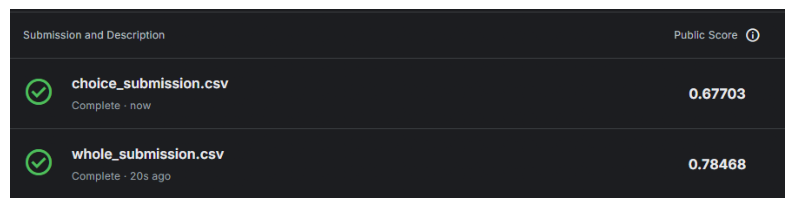

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'submit_result.png'
img = mpimg.imread(image_path)

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

- 전처리한 데이터의 변수 전체로 예측한 결과: 0.78468
- 전처리한 데이터의 일부 변수로 예측한 결과: 0.67703

## 결론: Pclass와 Fare만으로 Survived를 예측하기엔 아쉬운 부분이 있다.